In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd

df_calender_mars_23 = pd.read_csv("/content/drive/MyDrive/hackhathon_JO/Archive data/Paris/2023_03/calendar.csv.gz")
df_calender_mars_23['price'] = df_calender_mars_23['price'].replace('[\$,]', '', regex=True).astype(float)
df_calender_mars_23.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,5396,2023-03-14,f,123.0,$123.00,1.0,1125.0
1,5396,2023-03-15,f,123.0,$123.00,1.0,1125.0
2,5396,2023-03-16,f,124.0,$124.00,1.0,1125.0
3,5396,2023-03-17,f,124.0,$124.00,1.0,1125.0
4,5396,2023-03-18,f,124.0,$124.00,1.0,1125.0


In [ ]:

df_listing_mars_23 = pd.read_csv("/content/drive/MyDrive/hackhathon_JO/Archive data/Paris/2023_03/listings.csv.gz")
df_listing_mars_23.rename(columns={'listing_id': 'id'}, inplace=True)
df_listing_mars_23.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,5396,https://www.airbnb.com/rooms/5396,20230313171257,2023-03-14,city scrape,Explore the heart of old Paris,"Cozy, well-appointed and graciously designed s...","You are within walking distance to the Louvre,...",https://a0.muscache.com/pictures/52413/f9bf76f...,7903,...,4.83,4.95,4.54,7510402838018,f,1,1,0,0,1.99
1,7397,https://www.airbnb.com/rooms/7397,20230313171257,2023-03-29,city scrape,MARAIS - 2ROOMS APT - 2/4 PEOPLE,"VERY CONVENIENT, WITH THE BEST LOCATION !<br /...",NaN,https://a0.muscache.com/pictures/67928287/330b...,2626,...,4.88,4.93,4.73,7510400829623,f,2,2,0,0,2.26
2,7964,https://www.airbnb.com/rooms/7964,20230313171257,2023-03-14,city scrape,Sunny apartment with balcony,"We are renting our a spacious, sunny fully fur...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,22155,...,5.00,5.00,5.00,7510903576564,f,1,1,0,0,0.04
3,9359,https://www.airbnb.com/rooms/9359,20230313171257,2023-03-14,city scrape,"Cozy, Central Paris: WALK or VELIB EVERYWHERE !",Location! Location! Location! Just bring your ...,NaN,https://a0.muscache.com/pictures/c2965945-061f...,28422,...,NaN,NaN,NaN,"Available with a mobility lease only (""bail mo...",f,1,1,0,0,NaN
4,9952,https://www.airbnb.com/rooms/9952,20230313171257,2023-03-14,city scrape,Paris petit coin douillet,"Je suis une dame retraitée, qui propose un agr...","Vibrant neighborhood, full of bars, cafés, fre...",https://a0.muscache.com/pictures/ae822d16-74d2...,33534,...,4.84,4.88,4.91,7511101582862,f,1,1,0,0,0.35


In [ ]:
df_listing_mars_23.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [ ]:
# Sélection des colonnes spécifiées dans le DataFrame df_sans_france_23
df_23 = df_listing_mars_23.loc[:, ['id','host_since', 'host_location', 'host_response_time',
                                                     'review_scores_rating', 'calculated_host_listings_count',
                                                     'beds', 'price', 'availability_365',
                                                     'calculated_host_listings_count']]


In [ ]:
# Import des bibliothèques nécessaires
import pandas as pd
from datetime import datetime

# Convertir la colonne 'host_since' en format datetime
df_23['host_since'] = pd.to_datetime(df_23['host_since'])

# Calculer le nombre d'années depuis 'host_since' jusqu'à aujourd'hui
df_23['annees_experience'] = (datetime.now() - df_23['host_since']).dt.days // 365

# Supprimer la colonne 'host_since'
df_23.drop(columns=['host_since'], inplace=True)



In [ ]:
df_23['price']=df_23['price'].replace('[\$,]', '', regex=True).astype(float)

In [ ]:
df_23.head()

,id,host_location,host_response_time,review_scores_rating,calculated_host_listings_count,beds,price,availability_365,calculated_host_listings_count,annees_experience
0,5396,"İstanbul, Turkey",within an hour,4.54,1,1.0,124.0,184,1,15.0
1,7397,"Paris, France",within an hour,4.73,2,2.0,130.0,171,2,15.0
2,7964,"Paris, France",NaN,4.80,1,1.0,140.0,48,1,14.0
3,9359,"New York, NY",NaN,NaN,1,1.0,75.0,264,1,14.0
4,9952,"Paris, France",within an hour,4.91,1,1.0,160.0,141,1,14.0


In [ ]:
# Import des bibliothèques nécessaires
import pandas as pd
from datetime import datetime

df_listing_mars_24 = pd.read_csv("/content/drive/MyDrive/hackhathon_JO/Archive data/Paris/2024_03/listings.csv.gz")
# Sélection des colonnes spécifiées dans le DataFrame df_sans_france_23
df_24 = df_listing_mars_24 .loc[:, ['id','host_since', 'host_location', 'host_response_time',
                                                     'review_scores_rating', 'calculated_host_listings_count',
                                                     'beds', 'price', 'availability_365',
                                                     'calculated_host_listings_count']]

# Convertir la colonne 'host_since' en format datetime
df_24['host_since'] = pd.to_datetime(df_24['host_since'])

# Calculer le nombre d'années depuis 'host_since' jusqu'à aujourd'hui
df_24['annees_experience'] = (datetime.now() - df_24['host_since']).dt.days // 365

# Supprimer la colonne 'host_since'
df_24.drop(columns=['host_since'], inplace=True)
df_24['price']=df_24['price'].replace('[\$,]', '', regex=True).astype(float)

In [ ]:
df_24.head()

,id,host_location,host_response_time,review_scores_rating,calculated_host_listings_count,beds,price,availability_365,calculated_host_listings_count,annees_experience
0,3109,"Paris, France",within a day,5.00,1,1.0,250.0,355,1,15.0
1,165409,"Paris, France",within a few hours,4.68,1,1.0,140.0,25,1,12.0
2,5396,"Paris, France",within an hour,4.60,2,1.0,107.0,183,2,15.0
3,166370,"Paris, France",NaN,4.56,1,1.0,200.0,364,1,12.0
4,39948,"Paris, France",within a day,4.86,1,NaN,NaN,2,1,13.0


In [ ]:
(df_listing_mars_23['host_location'].unique())

array(['İstanbul, Turkey', 'Paris, France', 'New York, NY', ...,
       'Villers-Bocage, France', 'Hollywood, FL',
       'Scotland, United Kingdom'], dtype=object)

In [ ]:
# Supprimer les lignes qui ont "France" dans la colonne "host_location"
df_sans_france_23 = df_23[df_23['host_location'].str.contains('France') == False]
df_sans_france_23  = df_sans_france_23 [df_sans_france_23 ['host_location'].str.contains('Paris') == False]
df_sans_france_23  = df_sans_france_23 [df_sans_france_23 ['host_location'].str.contains('paris') == False]
df_sans_france_23 ['host_location'].unique()
len(df_sans_france_23 )

2048

In [ ]:
# Supprimer les lignes où la colonne 'host_location' est NaN
df_23_clean = df_23.dropna(subset=['host_location'])

# Filtre pour inclure uniquement les hôtes en France
df_en_france_23 = df_23_clean[df_23_clean['host_location'].str.contains('France')]

# Filtre pour inclure uniquement les hôtes à Paris
df_a_paris_23 = df_en_france_23[df_en_france_23['host_location'].str.contains('Paris')]


# Afficher les premières lignes du DataFrame avec les hôtes en France et à Paris
df_a_paris_23.head()

# Afficher le nombre d'entrées dans le DataFrame
print("Nombre d'entrées pour les hôtes en France et à Paris:", len(df_a_paris_23))


Nombre d'entrées pour les hôtes en France et à Paris: 40063


In [ ]:
# Supprimer les lignes où la colonne 'host_location' est NaN
df_24_clean = df_24.dropna(subset=['host_location'])

# Filtre pour inclure uniquement les hôtes en France
df_en_france_24 = df_24_clean[df_24_clean['host_location'].str.contains('France')]

# Filtre pour inclure uniquement les hôtes à Paris
df_a_paris_24 = df_en_france_24[df_en_france_24['host_location'].str.contains('Paris')]


# Afficher les premières lignes du DataFrame avec les hôtes en France et à Paris
df_a_paris_24.head()

# Afficher le nombre d'entrées dans le DataFrame
print("Nombre d'entrées pour les hôtes en France et à Paris:", len(df_a_paris_24))

Nombre d'entrées pour les hôtes en France et à Paris: 58784


In [ ]:
prix_fr_23=df_a_paris_23['price'].median()
print(prix_fr_23)

109.0


In [ ]:
prix_fr_24=df_a_paris_24['price'].median()
print(prix_fr_24)

159.0


In [ ]:
diff_fr=prix_fr_24-prix_fr_23
print(diff_fr)

50.0


In [ ]:
df_prix_france=pd.merge(df_a_paris_23,df_a_paris_24,on='id',how='inner')


In [ ]:
df_prix_france['difference_de_prix'] = df_prix_france['price_y'] - df_prix_france['price_x']

In [ ]:
df_prix_france.head()

,id,host_location_x,host_response_time_x,review_scores_rating_x,calculated_host_listings_count_x,beds_x,price_x,availability_365_x,calculated_host_listings_count_x,annees_experience_x,host_location_y,host_response_time_y,review_scores_rating_y,calculated_host_listings_count_y,beds_y,price_y,availability_365_y,calculated_host_listings_count_y,annees_experience_y,difference_de_prix
0,7397,"Paris, France",within an hour,4.73,2,2.0,130.0,171,2,15.0,"Paris, France",within an hour,4.73,6,2.0,134.0,218,6,15.0,4.0
1,7964,"Paris, France",NaN,4.80,1,1.0,140.0,48,1,14.0,"Paris, France",within a day,4.80,1,2.0,180.0,32,1,14.0,40.0
2,9952,"Paris, France",within an hour,4.91,1,1.0,160.0,141,1,14.0,"Paris, France",within a few hours,4.92,1,1.0,130.0,18,1,14.0,-30.0
3,10586,"Paris, France",within a few hours,4.84,4,2.0,80.0,133,4,14.0,"Paris, France",within a few hours,4.85,3,2.0,80.0,101,3,14.0,0.0
4,10588,"Paris, France",within a few hours,4.90,4,1.0,75.0,194,4,14.0,"Paris, France",within a few hours,4.90,3,1.0,75.0,153,3,14.0,0.0


In [ ]:
moyenne_colonne = df_prix_france['difference_de_prix'].mean()
print("Moyenne de la colonne :", moyenne_colonne)

Moyenne de la colonne : 17.76505647953681


In [ ]:
# Supprimer les lignes qui ont "France" dans la colonne "host_location"
df_sans_france_24 = df_24 [df_24 ['host_location'].str.contains('France') == False]
df_sans_france_24  = df_sans_france_24 [df_sans_france_24 ['host_location'].str.contains('Paris') == False]
df_sans_france_24  = df_sans_france_24 [df_sans_france_24 ['host_location'].str.contains('paris') == False]
df_sans_france_24['host_location'].unique()
len(df_sans_france_24 )

2815

In [ ]:
df_sans_france_24.head()


,id,host_location,host_response_time,review_scores_rating,calculated_host_listings_count,beds,price,availability_365,calculated_host_listings_count,annees_experience
16,168695,"Recife, Brazil",within an hour,4.88,1,1.0,40.0,37,1,12.0
19,9359,"New York, NY",NaN,NaN,1,1.0,75.0,279,1,14.0
42,53353,"Abidjan, Côte d’Ivoire",within an hour,4.95,1,3.0,245.0,355,1,13.0
46,200845,"London, United Kingdom",within a day,4.32,2,1.0,90.0,198,2,12.0
63,58569,"Molini di Triora, Italy",within a day,4.00,1,1.0,140.0,339,1,13.0


In [ ]:
prix_hors_moyenne_24=df_sans_france_24['price'].median()
print(prix_hors_moyenne_24)

200.0


In [ ]:
prix_hors_moyenne_23=df_sans_france_23['price'].median()
print(prix_hors_moyenne_23)

120.0


In [ ]:
diff_hors=prix_hors_moyenne_24-prix_hors_moyenne_23
print(diff_hors)

80.0


In [ ]:
prix_hors_moyenne_24=df_sans_france_24['price'].mean()
print(prix_hors_moyenne_24)

In [ ]:
df_prix['difference_de_prix'] = df_prix['price_y'] - df_prix['price_x']
df_prix.head()

,id,host_location_x,host_response_time_x,review_scores_rating_x,calculated_host_listings_count_x,beds_x,price_x,availability_365_x,calculated_host_listings_count_x,annees_experience_x,host_location_y,host_response_time_y,review_scores_rating_y,calculated_host_listings_count_y,beds_y,price_y,availability_365_y,calculated_host_listings_count_y,annees_experience_y,difference_de_prix
2,94270,"Rome, Italy",within a few hours,4.74,2,3.0,149.0,84,2,13.0,"Rome, Italy",within an hour,4.72,2,3.0,149.0,72,2,13.0,0.0
5,108591,United Kingdom,within a day,5.00,2,4.0,349.0,217,2,13.0,United Kingdom,within an hour,5.00,3,4.0,299.0,303,3,13.0,-50.0
6,168695,"New York, NY",within an hour,4.84,1,1.0,54.0,59,1,12.0,"Recife, Brazil",within an hour,4.88,1,1.0,40.0,37,1,12.0,-14.0
12,579977,"Los Angeles, CA",within an hour,4.83,1,2.0,174.0,317,1,12.0,"Los Angeles, CA",within an hour,4.87,1,2.0,116.0,300,1,12.0,-58.0
13,536347,"New York, NY",within a day,4.68,1,4.0,161.0,164,1,11.0,"New York, NY",within a few hours,4.69,1,4.0,90.0,293,1,11.0,-71.0


In [ ]:
moyenne_colonne_hors = df_prix['difference_de_prix'].mean()
print("Moyenne de la colonne :", moyenne_colonne_hors)


Moyenne de la colonne : -238.0040404040404


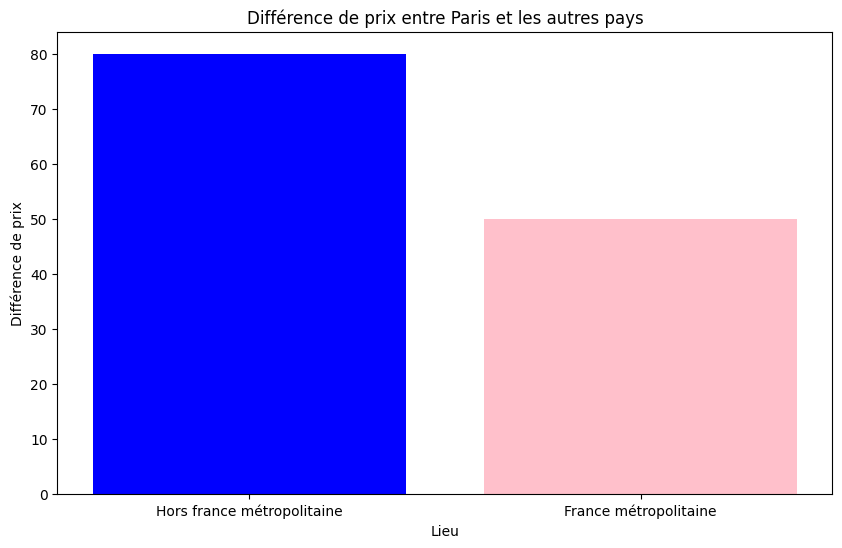

In [ ]:
import matplotlib.pyplot as plt

# Créer un graphique à barres pour les différences de prix
plt.figure(figsize=(10, 6))
plt.bar(['Hors france métropolitaine', 'France métropolitaine'], [diff_hors, diff_fr], color=['blue', 'pink'])
plt.title("Différence de prix entre Paris et les autres pays")
plt.xlabel("Lieu")
plt.ylabel("Différence de prix")
plt.show()


